## Setup

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 3, 4, 5]
y = [e**2 for e in x]

print(x)
print(y)

def create_field(min_coord=0, max_coord=10, num_points=11):
    x_lin = np.linspace(min_coord, max_coord, num_points)
    y_lin = np.linspace(min_coord, max_coord, num_points)
    X,Y = np.meshgrid(x_lin, y_lin)

    Z = X**2 + Y**2
    
    return X,Y,Z

[1, 2, 3, 4, 5]
[1, 4, 9, 16, 25]


## XY Grid Datapoints

In [3]:
X,Y = np.meshgrid(x, x)
print(X)
print(Y)

[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]


## Plotting the XY Grid

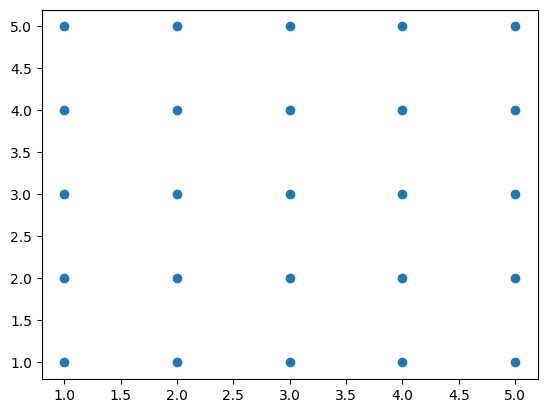

In [4]:
fig, ax = plt.subplots()
ax.scatter(X, Y)

## XY Grid via linspace

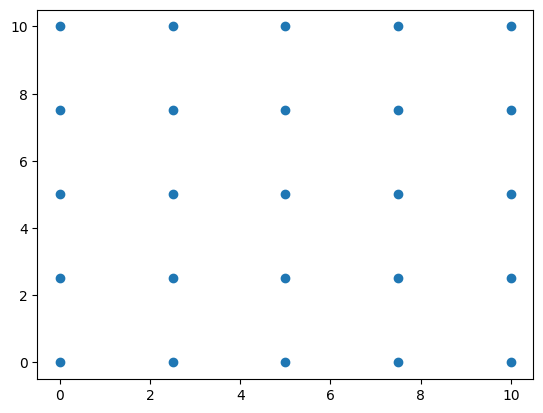

In [8]:
x_lin = np.linspace(0, 10, 5)  #0 to 10 (inclusive), 5 total points
y_lin = np.linspace(0, 10, 5)
X,Y = np.meshgrid(x_lin, y_lin)

fig, ax = plt.subplots()
ax.scatter(X, Y)

## Z = f(X, Y)

RdBu color map scales from dark blue to dark red with transparent in the middle.  It automatically scales over the range of the actual data (finding the max and min).

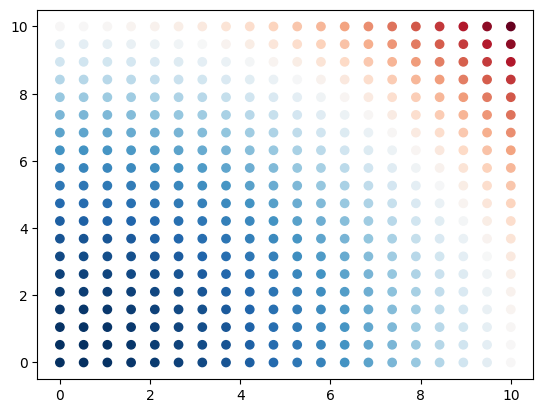

In [10]:
x_lin = np.linspace(0, 10, 20)
y_lin = np.linspace(0, 10, 20)
X,Y = np.meshgrid(x_lin, y_lin)

Z = X**2 + Y**2      # can write equations like this due to vectorization and element-wise operators

fig, ax = plt.subplots()
ax.scatter(X, Y, c=Z, cmap='RdBu_r')    # cmap changes how color values are interpretted

## Custom colormap range

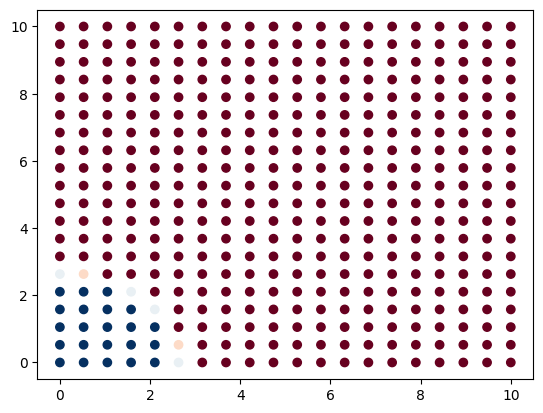

In [42]:
X,Y,Z = create_field(0, 10, 20)

fig, ax = plt.subplots()
ax.scatter(X, Y, c=Z, cmap='RdBu_r', vmin=6, vmax=8)    # cmap changes how color values are interpretted

## Some other color maps

See the full list at https://matplotlib.org/stable/tutorials/colors/colormaps.html

Text(0.5, 1.0, 'viridis (default)')

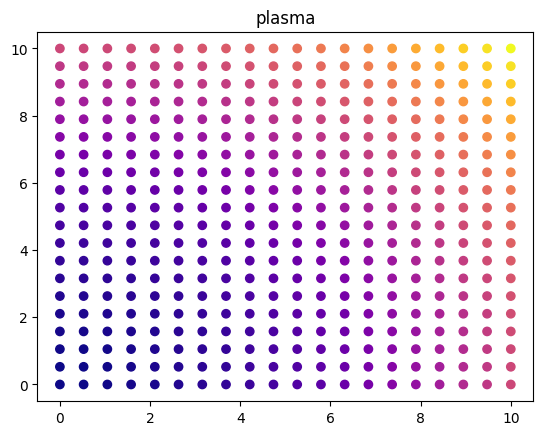

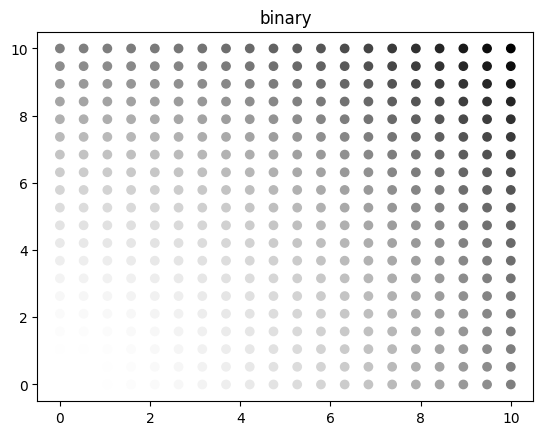

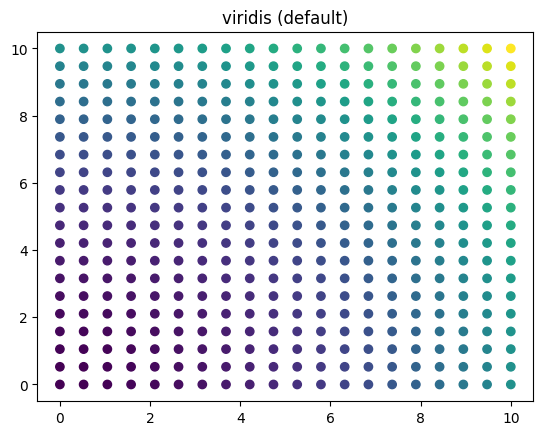

In [43]:
X,Y,Z = create_field(0, 10, 20)     

fig, ax = plt.subplots()
ax.scatter(X, Y, c=Z, cmap='plasma')
ax.set_title('plasma')

fig, ax = plt.subplots()
ax.scatter(X, Y, c=Z, cmap='binary')
ax.set_title('binary')

fig, ax = plt.subplots()
ax.scatter(X, Y, c=Z, cmap='viridis')
ax.set_title('viridis (default)')

## Colorbar

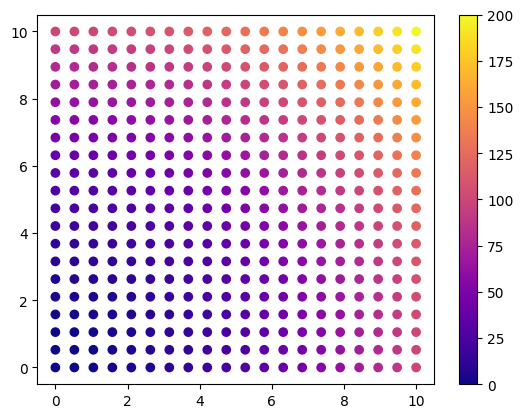

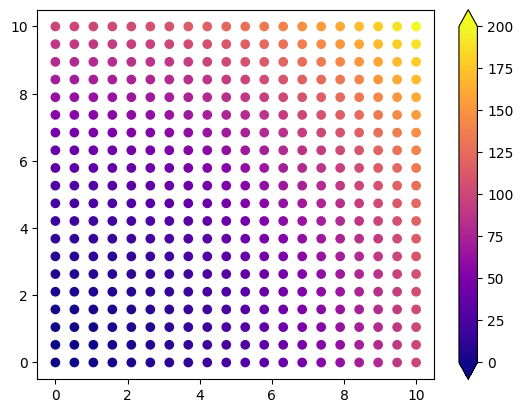

In [44]:
X,Y,Z = create_field(0, 10, 20)      

fig, ax = plt.subplots()
pc = ax.scatter(X, Y, c=Z, cmap='plasma')   # need to save the return value of the plot operation
fig.colorbar(pc, ax=ax)                     # requires all 3 objects (figure, axes, scatter plot)

fig, ax = plt.subplots()
pc = ax.scatter(X, Y, c=Z, cmap='plasma')   
fig.colorbar(pc, ax=ax, extend='both')                     # again with arrows on upper and lower

## Color Mesh

Depending on the shading you use, you can get different amounts of smoothness or blockiness.

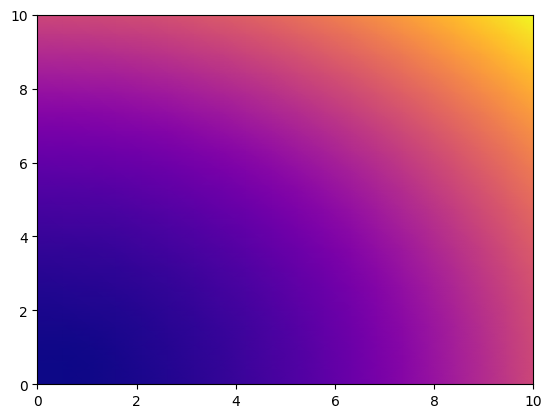

In [46]:
X,Y,Z = create_field(0, 10, 20)      

fig, ax = plt.subplots()
ax.pcolormesh(X, Y, Z, cmap='plasma', shading='gouraud')  # similar to scatter but no c= before the Z

## Contours

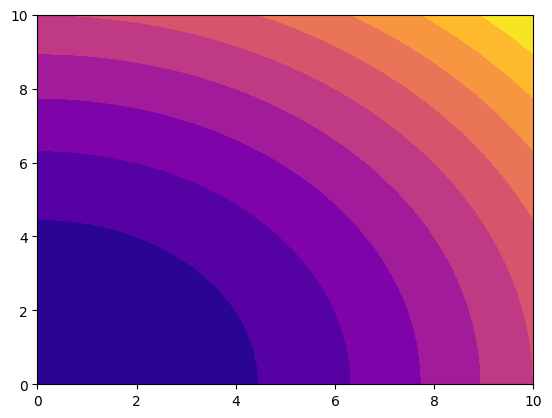

In [47]:
X,Y,Z = create_field(0, 10, 20)      

fig, ax = plt.subplots()
ax.contourf(X, Y, Z, levels=10, cmap='plasma')

## Image Show

Input matrix interpretted as scanning rows from left to right top down.  Image is pixelated because it's interpretted as a raster image.

Z Shape: (20, 20)


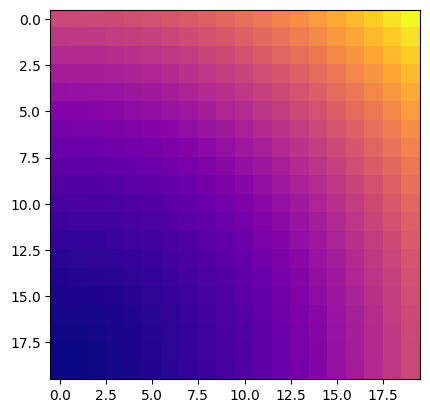

In [48]:
X,Y,Z = create_field(0, 10, 20)
Z = np.flip(Z, axis=0)              # need to flip the y-axis to make it look like the other plots
print(f'Z Shape: {Z.shape}')        # Z is a matrix

fig, ax = plt.subplots()
ax.imshow(Z, cmap='plasma')

## Norm (color scaling)

You can customize the scaling of values before they become color mapped (default is linear).  This works for *any plot type above*.

You can combine with *vmin* and *vmax*.

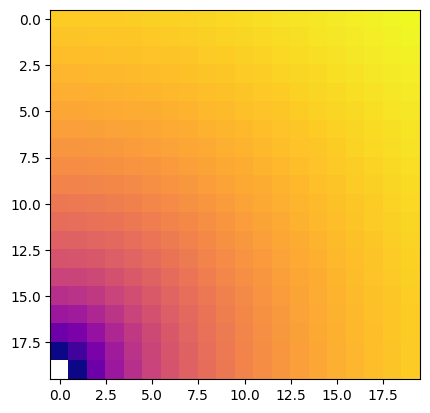

In [57]:
X,Y,Z = create_field(0, 10, 20)
Z = np.flip(Z, axis=0)  

fig, ax = plt.subplots()
ax.imshow(Z, cmap='plasma', norm='log')